Brian Kurniawan Unsupervised Learning with python

    
Submitted on the 1st of February 2020 
    
    
Please do contact us in case of any questions! 
    
    

# AGENDA
<strong>2. Agenda/Intro/Markdown Insights</strong>

## All Code
<strong>3. Preparation of the script </strong>

<strong>4. Data inspection </strong>

<strong>5. 5 Personality Trait Analysis </strong>

<strong>6. Hult DNA Trait Analysis </strong>

In this research, our team has analyzed, interpreted, and clustered the various characteristics that differentiate Apple's customers from those who prefer Windows. 

The team went over the 137 observations given in the survey to find a common path between the traits. First, we analyzed all the variables and discovered there are 3 identical questions on the survey, these include: 

“Take initiative even when circumstances, objectives, or rules aren’t clear”;

“Respond effectively to multiple priorities “;

“Encourage direct and open discussion”. 

Afterward, the team identified if the survey interviewers had read and answered all the questions instead of responding hastily. As to do so, we decided to use the for loop function to identify if the people answered the same question with the same answer ( we set a maximum of 1-degree difference). The team had to exclude 8 interviewers from the survey because the replies provided were inconsistent. So we proceed with 129 observations. 

We observed and clumped 50 'Big Personality Traits' and 17 'Hult DNA's' traits as our factors based on Psychological Models.

Given these models, we run an analysis based on the customer's behavior and personality of our sample. The result makes clear if there is a correlation between their emotional traits and the purchase of the different brands.

We have started working with the “Big 5 Personality Traits ”, a psychological model that explains the differences between people’s temperaments. Each one reflects these features that outline a key part of how a person thinks, feels, and behaves. 
These 5 major traits are:

•	Thinking (includes aspects such as intellectual curiosity and creative imagination)

•	Conscientiousness (organization, productiveness, responsibility)

•	Extroversion (sociability, assertiveness; its opposite is Introversion)

•	Agreeableness (compassion, respectfulness, trust in others)

•	Emotional Stability (tendencies toward anxiety and depression)

These features not only help people to understand better how they compare to each other's but also to explore relationships between personality and many other life indicators. Personality psychologists have observed reliable associations between how people rate on trait scales and how they fare or feel, on average, in various aspects of their lives. These emotional characteristics include consequential outcomes such as physical health and well-being as well as success in social, academic, and professional contexts.

So based on our Scree Plot, we assume 5 PCAs are the appropriate number based on the elbow in it:

•	Indecisive (High Conscientiousness, Low Emotional Stability)

•	Reckless (High extraversion low emotional stab)

•	Impressionable (High agreeableness low extraversion)

•	Condescending (High intellect, low agreeableness)

•	Sensible (High Emotional stability, low extraversion)

We run a Boxplot graph to visualize our PCAs and the 5 main traits of people. 

The interviewed who got categorized as “Decisive”,  are likely to own more Windows than Apple and have very small to nothing differences compared to our PCA. This is aligned with the surveyed traits who are confident decision-makers: are less likely to change their choice, and are comfortable with risk. 

People who are deemed as “Computer Snob” own more Windows than Macbook, however, if all laptops cost the same, this group would be more likely to buy Macbook. 

With the PCA of "Reckless and Impressionable" clusters of customers categorized as ‘Meticulous’,  typically own more Apple than Windows, however, we discovered that are not loyal to the brand and so are more likely to purchase a Microsoft laptop whenever needed. 

On average, there is a small insignificant difference on the "Condescending" (High Intellect, low agreeableness) PCA. 
Only the 'Computer Snobs' cluster and 'Weak Traits' cluster would prefer a windows laptop over a MacBook when assuming all laptops cost the same.

#CONTINUE WITH HULT PCA


In the second model, named "Hult DNA's", we have found, and cluster 17 different traits based on 3 major characteristics. Hult DNA's are a series of aspirations characteristic for professional development that the business school's students are supposed to have and embrace. These features are summarized in three critical ones:

•	Thinking

•	Communicating

•	Team Building



These leadership skills are specific behavioral descriptions that can be measured and developed.

From our analysis, the team can affirm that most Hult students who own a Macbook are in the non_excellent_workers cluster in the first two PCA, Low Hult DNA and Individualistic High Performer, and in Effective Non-Innovator they are in the cluster hard_working_easy_tasks . Students who own a windows laptop also follow a similar pattern.

With the PCAs of Low Hult DNA and Individualistic High Performer , we can see that the cluster of non_excellent_workers have about an even spread between macbooks and windows laptop. However we can see that next time around if they were to purchase a laptop, they are more likely to buy a windows laptop. Besides that we had discovered that most of the results we have are very similar to their opposite, so there's no big difference between most of the variables. Even though we could still define the different traits that are more likely to be part of students who own Microsoft and the ones who own Apple.


<h1>Part I: Preparation</h1><br>
Run the following code to import necessary packages, load data, and set display options. 


In [1]:
 ########################################
# importing packages
########################################
import numpy             as np
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions


# sklearn libraries 
from sklearn.preprocessing import StandardScaler # standard scaler    
from sklearn.decomposition import PCA            # pca
from sklearn.datasets      import load_digits    # digits dataset
from sklearn.manifold      import TSNE           # t-SNE
from sklearn.preprocessing import OrdinalEncoder # to get the variables 
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

########################################
# loading data and setting display options
########################################
# loading data
digits = load_digits()


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
pd.np.set_printoptions(threshold=sys.maxsize)


########################################
# chacking the type of the dataset
########################################
type(digits)

<ipython-input-1-097f09714bcd>:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.set_printoptions(threshold=sys.maxsize)


sklearn.utils.Bunch

In [2]:
## WE load some impotant user defined functions
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

# Data inspection

In [3]:
########################################
# loading data and setting display options
########################################
# loading data
survey_df = pd.read_excel('./survey_data.xlsx')

# looking at the 
survey_df.head(n = 5)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,10003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,10004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


In [4]:
# summary of decriptive statistics
survey_df.describe().round (decimals = 2)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,10068.00,3.01,2.78,3.55,2.89,3.35,2.88,3.85,2.41,3.28,2.33,3.66,1.70,4.12,3.55,3.96,3.09,4.09,2.31,2.96,2.12,3.39,2.50,3.34,2.62,3.88,2.64,3.67,2.34,2.43,2.20,2.98,2.30,3.82,2.77,3.92,3.22,3.66,2.31,2.46,2.75,2.99,3.89,3.80,2.56,3.94,3.45,3.86,3.81,2.44,3.84,4.02,2.39,4.04,4.15,4.00,3.91,4.02,4.08,3.96,4.03,4.01,2.79,4.14,4.24,3.93,2.58,3.93,3.93,4.09,3.76,4.22,27.23
std,39.69,1.14,1.33,0.92,1.22,0.95,1.09,0.98,1.36,1.10,1.10,1.00,0.93,0.80,1.18,0.95,0.95,0.86,1.10,1.03,1.03,0.99,1.12,1.01,1.11,0.72,1.04,1.06,1.16,1.17,1.13,1.09,1.03,1.02,1.12,0.93,1.16,0.97,0.97,1.22,1.03,1.21,1.02,1.03,1.17,0.92,1.08,0.77,0.91,1.07,0.87,0.77,1.11,0.77,0.78,0.81,0.92,0.82,0.73,0.89,0.78,0.81,1.02,0.72,0.68,0.74,1.12,0.81,0.70,0.77,0.87,0.78,5.12
min,10000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,21.00
25%,10034.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.00,1.00,3.00,1.00,4.00,3.00,3.00,

In [5]:
# We generate a list that we can use to build groups of dataframes 
list(survey_df.columns) 

['surveyID',
 'Am the life of the party',
 'Feel little concern for others',
 'Am always prepared',
 'Get stressed out easily',
 'Have a rich vocabulary',
 "Don't talk a lot",
 'Am interested in people',
 'Leave my belongings around',
 'Am relaxed most of the time',
 'Have difficulty understanding abstract ideas',
 'Feel comfortable around people',
 'Insult people',
 'Pay attention to details',
 'Worry about things',
 'Have a vivid imagination',
 'Keep in the background',
 "Sympathize with others' feelings",
 'Make a mess of things',
 'Seldom feel blue',
 'Am not interested in abstract ideas',
 'Start conversations',
 "Am not interested in other people's problems",
 'Get chores done right away',
 'Am easily disturbed',
 'Have excellent ideas',
 'Have little to say',
 'Have a soft heart',
 'Often forget to put things back in their proper place',
 'Get upset easily',
 'Do not have a good imagination',
 'Talk to a lot of different people at parties',
 'Am not really interested in others',

In [6]:
# inspecting the data 
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 79 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   surveyID                                                                      137 non-null    int64 
 1   Am the life of the party                                                      137 non-null    int64 
 2   Feel little concern for others                                                137 non-null    int64 
 3   Am always prepared                                                            137 non-null    int64 
 4   Get stressed out easily                                                       137 non-null    int64 
 5   Have a rich vocabulary                                                        137 non-null    int64 
 6   Don't talk a lot                          

## printing the dataset 

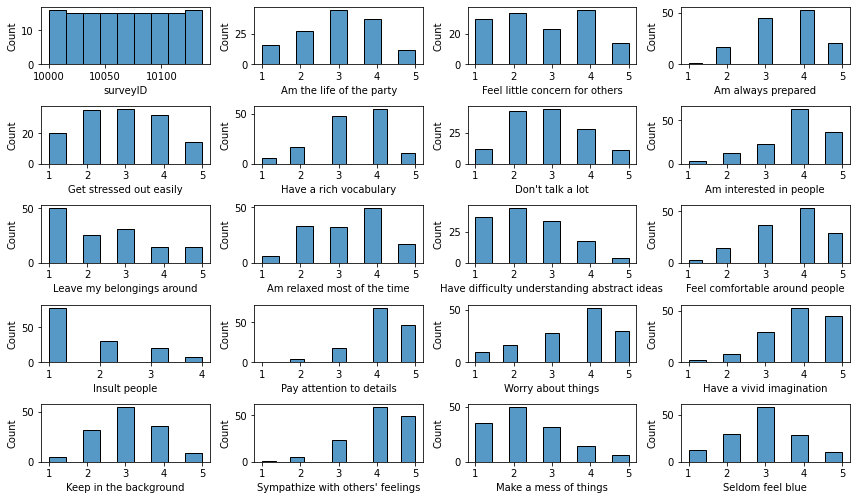

In [7]:
# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))

# initializing a counter
count = 0

# looping to create visualizations
for col in survey_df:

    # condition to break
    if count == 20:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(6, 4, count)
    sns.histplot(x = survey_df[col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
plt.savefig('./survey_df_histograms.png')
plt.show()

First observation: 
 - to little observation to say something about the distribution of the data 
 - no missing values 
 - lots of different variables 
 



## cleaning the dataset 

### duplicated questions 

In [8]:
# renaming some of the variables (dublicate variables)

survey_df = survey_df.rename(columns={'Respond effectively to multiple priorities.1': 'Respond Duplicate Q', 
                                      'Take initiative even when circumstances, objectives, or rules aren\'t clear.1':'Initiative Duplicate Q',
                                      'Encourage direct and open discussions.1': 'Encourage Duplicate Q'})

In [9]:
# Looking for diferent answers on the survey. 
# There are 3 exact same questions, if the difference in the responses is more than 1
# that would mean that the person was not paying attention wile doing the survey
# Therefore, we should drop that observation

# RESPONSE  

#For Respond effectively duplicate
survey_df['Similar Respond Qs Diff'] = 0

for index, value in survey_df.iterrows():
    
    if survey_df.loc[index, 'Respond effectively to multiple priorities']:
        survey_df.loc[index, 'Similar Respond Qs Diff'] = (survey_df.loc[index, 'Respond effectively to multiple priorities']
                                              - survey_df.loc[index, 'Respond Duplicate Q']) 
    # getting the absolut value of the difference (we dont want to differentiate for positive and negative)
    survey_df.loc [index,'Similar Respond Qs Diff'] = abs (survey_df.loc [index,'Similar Respond Qs Diff'])

# INITATIVE 
    
#For Take Initiative duplicate        
survey_df['Similar Initiative Qs Diff'] = 0

for index, value in survey_df.iterrows():
    
    if survey_df.loc[index, 'Take initiative even when circumstances, objectives, or rules aren\'t clear']:
        survey_df.loc[index, 'Similar Initiative Qs Diff'] = (survey_df.loc[index, 'Take initiative even when circumstances, objectives, or rules aren\'t clear']
                                              - survey_df.loc[index, 'Initiative Duplicate Q']) 

         # getting the absolut value of the difference (we dont want to differentiate for positive and negative)
    survey_df.loc [index,'Similar Initiative Qs Diff'] = abs (survey_df.loc [index,'Similar Initiative Qs Diff'])

    
#  ENCOURAGE     
        
#For Encourage duplicate        
survey_df['Similar Encourage Qs Diff'] = 0

for index, value in survey_df.iterrows():
    
    if survey_df.loc[index, 'Encourage direct and open discussions']:
        survey_df.loc[index, 'Similar Encourage Qs Diff'] = (survey_df.loc[index, 'Encourage direct and open discussions']
                                              - survey_df.loc[index, 'Encourage Duplicate Q']) 

        
   # getting the absolut value of the difference (we dont want to differentiate for positive and negative)
    survey_df.loc [index,'Similar Encourage Qs Diff'] = abs (survey_df.loc [index,'Similar Encourage Qs Diff'])        
        

In [10]:

# checking if the value creation has worked 

survey_df.head(n = 5)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond Duplicate Q,Initiative Duplicate Q,Encourage Duplicate Q,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,Similar Respond Qs Diff,Similar Initiative Qs Diff,Similar Encourage Qs Diff
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,0,0,0
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,1,1,0
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,0,0,0
3,10003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,1,1,0
4,10004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,0,0,1


In [11]:
# looking specifically at the values 
survey_df.loc[ : , ['Similar Respond Qs Diff', 'Similar Initiative Qs Diff', 'Similar Encourage Qs Diff']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Similar Respond Qs Diff     137 non-null    int64
 1   Similar Initiative Qs Diff  137 non-null    int64
 2   Similar Encourage Qs Diff   137 non-null    int64
dtypes: int64(3)
memory usage: 3.3 KB


In [12]:
# Drop observations that answered different for the same question

# initiating the for loop 
for index, value in survey_df.iterrows():
    
    
    misstake_count = 0 # initating a count value 
    if survey_df.loc[index, 'Similar Respond Qs Diff'] > 1: 
        misstake_count = misstake_count +1
        pass # passing to the next if statement 
    
    if survey_df.loc[index, 'Similar Initiative Qs Diff'] > 1: 
        misstake_count = misstake_count +1
        pass # going to the next if 
    
    if survey_df.loc[index, 'Similar Encourage Qs Diff'] > 1: 
        misstake_count = misstake_count +1 
        pass # going to the final if 
    
    if misstake_count >=1:  # looking at the final misstake count value 
        survey_df.drop (index, inplace = True)
        misstake_count = 0 

    else:  # even if the misstake_count == 0, we want to set it back just to make sure 
        misstake_count = 0 
    
      
    

# we see that 8 observations have been dropped! (from 137 to 129 observations)    
survey_df.shape

(129, 82)

###  REVERSED QUESTIONS: 
Reversed questions are there to test if the person answering the questionnaire is paying attention/ understands the questions. 

In [13]:
# this is just to check if the below "reversal" algorithm has worked 

survey_df.loc[:,"Feel little concern for others"].head()

0    3
1    4
2    4
3    5
4    4
Name: Feel little concern for others, dtype: int64

In [14]:
# REALLY IMPORTANT: DO JUST RUN THIS CELl ONCE!!!!!!!!!!!
    # otherwise thecell is returning the variables into the wrong scale again!
    

# FIVE FORCES and HULT DNA



# list with all the variables that need to be converted 
# This variables have another question that ask for the opposite

list_to_convert = ["Feel little concern for others","Insult people",
                   "Am quiet around strangers","Am not interested in other people's problems",
                   "Am not really interested in others",
                   "Have difficulty understanding abstract ideas",
                   "Am not interested in abstract ideas", 
                   "Do not have a good imagination",
                   "Do not have a good imagination",
                   "Make a mess of things",
                   "Often forget to put things back in their proper place", 
                   "Shirk my duties", "Get stressed out easily", 
                   "Worry about things",
                   "Am easily disturbed","Get upset easily",
                   "Change my mood a lot",
                   "Get irritated easily","Often feel blue", 
                   "Don't talk a lot",
                   "Keep in the background","Have little to say",
                   "Don't like to draw attention to myself",
                   "Am quiet around strangers",
                   "Don't persuasively sell a vision or idea",     # from here one we start with theh HULT DNA
                  "Can't rally people on the team around a common goal",
                  "Don't  generate ideas that are new and different"]

## using the list and creating a loop 

# outer for loop : is looping through the list generated by us 
for variable in list_to_convert: 
    
    # inner for loop: is looping through all observations in the dataframe 
    for index, value in survey_df.iterrows():
    
        if survey_df.loc [index, variable] == 1: # first condition
            survey_df.loc[index, variable]= 5
        elif survey_df.loc[index, variable] == 2: 
            survey_df.loc[index, variable]= 4
        elif survey_df.loc[index, variable] == 4: 
            survey_df.loc[index, variable]= 2
        elif survey_df.loc[index, variable] == 5: 
            survey_df.loc[index, variable]= 1
        
# After reversing we can compare this answers with the ones from the similar questions

## Categorization of data


In [15]:
# we split the data 
#purchase behavior df
purchase_behavior_df = survey_df.iloc [:,72:74]


# demographics_df 
five_traits_df = survey_df.iloc[:, 1: 51] 


# emotional_df 
HULT_dna_df = survey_df.iloc[:, [51, 52,54,55,56,57, 61, 62, 63, 64,65,66,67,68,69,70,71] ]

## demographics
demographics_df = survey_df.iloc [: ,[75,76, 77, 78,79]]


HULT_dna_df

,See underlying patterns in complex situations,Don't generate ideas that are new and different,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results
0,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4
1,4,4,4,4,4,5,5,4,4,4,2,3,4,5,5,4,5
2,3,4,3,5,2,3,3,4,3,4,4,4,4,2,3,3,5
3,3,3,5,5,5,4,5,3,5,5,5,1,3,5,5,5,5
4,3,3,3,3,3,3,4,2,3,3,4,2,3,3,3,3,3
5,4,4,4,4,3,3,4,2,3,4,3,4,3,3,5,3,4
6,4,3,5,4,3,4,4,4,4,5,4,2,5,4,5,4,5
7,4,4,4,4,4,4,4,3,4,4,4,5,5,4,4,4,4
8,4,2,4,4,3,4,4,3,4,4,4,4,4,4,4,4,4
9,4,5,5,5,5,4,4,4,4,5,4,3,4,4,5,4,5


In [16]:
# Checkin the data frame
purchase_behavior_df.head()

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?
0,Macbook,Macbook
1,Windows laptop,Windows laptop
2,Windows laptop,Windows laptop
3,Windows laptop,Windows laptop
4,Macbook,Windows laptop


In [17]:
### Working on the purchase behavior dataset

In [19]:

# Changing the pruchase_behavior varialbes to categorical 

purchase_behavior_df["What laptop do you currently have?"] = purchase_behavior_df["What laptop do you currently have?"].astype('category')

purchase_behavior_df["What laptop would you buy in next assuming if all laptops cost the same?"] = purchase_behavior_df["What laptop would you buy in next assuming if all laptops cost the same?"].astype('category')


purchase_behavior_df.dtypes

What laptop do you currently have?                                          category
What laptop would you buy in next assuming if all laptops cost the same?    category
dtype: object

In [20]:
from sklearn.preprocessing import OrdinalEncoder
## making the varialbes biominal 
ord_enc = OrdinalEncoder()
purchase_behavior_df["laptop"] = ord_enc.fit_transform(purchase_behavior_df[["What laptop do you currently have?"]])
purchase_behavior_df[["laptop", "What laptop do you currently have?"]].head(n=5)

,laptop,What laptop do you currently have?
0,0.0,Macbook
1,1.0,Windows laptop
2,1.0,Windows laptop
3,1.0,Windows laptop
4,0.0,Macbook


In [21]:
# Creating new variables
ord_enc = OrdinalEncoder()
purchase_behavior_df["future_laptop"] = ord_enc.fit_transform(purchase_behavior_df[["What laptop would you buy in next assuming if all laptops cost the same?"]])
purchase_behavior_df[["future_laptop", "What laptop would you buy in next assuming if all laptops cost the same?"]].head(n=5)

,future_laptop,What laptop would you buy in next assuming if all laptops cost the same?
0,1.0,Macbook
1,2.0,Windows laptop
2,2.0,Windows laptop
3,2.0,Windows laptop
4,2.0,Windows laptop


In [22]:
## checking the results 

purchase_behavior_df.head()

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,laptop,future_laptop
0,Macbook,Macbook,0.0,1.0
1,Windows laptop,Windows laptop,1.0,2.0
2,Windows laptop,Windows laptop,1.0,2.0
3,Windows laptop,Windows laptop,1.0,2.0
4,Macbook,Windows laptop,0.0,2.0


### Scaling the data - purchase behavior per COLUMN 

In [23]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(purchase_behavior_df.iloc[: ,[-1,-2]])


# TRANSFORMING our data after fit
X_scaled = scaler.transform(purchase_behavior_df.iloc[: ,[-1,-2]])


# converting scaled data into a DataFrame
purchases_scaled = pd.DataFrame(X_scaled)


# reattaching column names
purchases_scaled.columns = purchase_behavior_df.iloc[: ,[-1,-2]].columns


# checking pre- and post-scaling variance
print(pd.np.var(purchase_behavior_df), '\n\n')
print(pd.np.var(purchases_scaled))

laptop           0.249985
future_laptop    0.287122
dtype: float64 


future_laptop    1.0
laptop           1.0
dtype: float64


<ipython-input-23-0131d4ece367>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(purchase_behavior_df), '\n\n')
<ipython-input-23-0131d4ece367>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(purchases_scaled))


## Scaling per ROW 



In [24]:
# HULT DNA Scalling 


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(HULT_dna_df)


# TRANSFORMING our data after fit
X_HULT_df_scaled = scaler.transform(HULT_dna_df)


# converting scaled data into a DataFrame
HULT_dna_df_scaled = pd.DataFrame(X_HULT_df_scaled )


# reattaching column names
HULT_dna_df_scaled.columns = HULT_dna_df.columns


# checking pre- and post-scaling variance
print(pd.np.var(HULT_dna_df), '\n\n')
print(pd.np.var(HULT_dna_df_scaled))

See underlying patterns in complex situations                                 0.588186
Don't  generate ideas that are new and different                              1.139475
Display a growth mindset                                                      0.544559
Respond effectively to multiple priorities                                    0.593955
Take initiative even when circumstances, objectives, or rules aren't clear    0.724836
Encourage direct and open discussions                                         0.579893
Listen carefully to others                                                    0.658374
Don't persuasively sell a vision or idea                                      1.003906
Build cooperative relationships                                               0.515354
Work well with people from diverse cultural backgrounds                       0.460069
Effectively negotiate interests, resources, and roles                         0.524728
Can't rally people on the team around a com

<ipython-input-24-d71d14a3d18e>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(HULT_dna_df), '\n\n')
<ipython-input-24-d71d14a3d18e>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(HULT_dna_df_scaled))


In [25]:
# 5 emotional traits scalling 


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(five_traits_df )


# TRANSFORMING our data after fit
five_traits_df_scaled = scaler.transform(five_traits_df )


# converting scaled data into a DataFrame
five_traits_df_scaled = pd.DataFrame(five_traits_df_scaled )


# reattaching column names
five_traits_df_scaled.columns = five_traits_df .columns


# checking pre- and post-scaling variance
print(pd.np.var(five_traits_df ), '\n\n')
print(pd.np.var(five_traits_df_scaled))

Am the life of the party                                 1.263506
Feel little concern for others                           1.709753
Am always prepared                                       0.802716
Get stressed out easily                                  1.413737
Have a rich vocabulary                                   0.886726
Don't talk a lot                                         1.123250
Am interested in people                                  0.937203
Leave my belongings around                               1.768524
Am relaxed most of the time                              1.170723
Have difficulty understanding abstract ideas             1.119284
Feel comfortable around people                           0.971336
Insult people                                            0.886726
Pay attention to details                                 0.647197
Worry about things                                       1.350039
Have a vivid imagination                                 0.910883
Keep in th

<ipython-input-25-859baaa6e4b7>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(five_traits_df ), '\n\n')
<ipython-input-25-859baaa6e4b7>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(five_traits_df_scaled))


----end of variable scaling (not PC´s) 

# Five Personality Trait Analysis 

In [26]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 5,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
five_PCA = pca.fit_transform(five_traits_df_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", five_traits_df_scaled.shape)
print("PCA shape     :",  five_PCA.shape)

Original shape: (129, 50)
PCA shape     : (129, 5)


In [27]:
# component number counter
# There are 50 variables, we choose 5 of them since adding more variables
# does not generate relevant value 
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(decimals = 4)}")
    

PC 1 : 0.1312
PC 2 : 0.0844
PC 3 : 0.0749
PC 4 : 0.0608
PC 5 : 0.0549


In [28]:
# here we try to figure out how many PC´s we shall use 
print(pca.explained_variance_ratio_[0:10].sum().round(decimals = 4))

0.4062


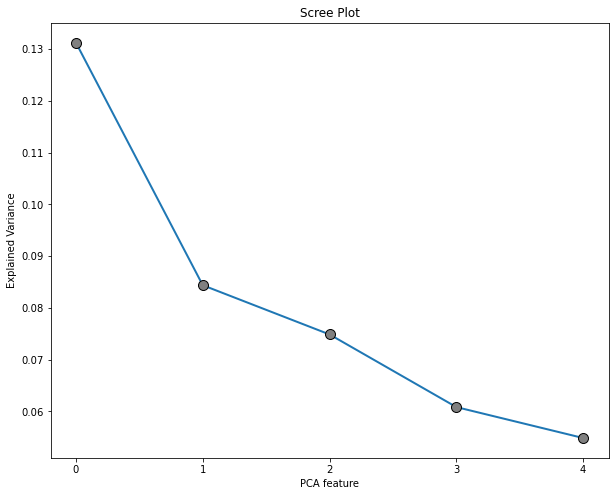

In [29]:
# calling the scree_plot function
# showing the top 5 PC
scree_plot(pca_object = pca)

In [30]:
### Evaluating which features are influencing our PC´s 
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))

# naming rows as original features
factor_loadings = factor_loadings.set_index(five_traits_df_scaled.columns)

##################
### 3 PC Model ###
##################
# transposing pca components (pc = 6)
#factor_loadings_6 = pd.DataFrame(pd.np.transpose(pca_6.components_))


# naming rows as original features
#factor_loadings_6 = factor_loadings_6.set_index(purchases_scaled.columns)


# checking the results
print(f"""

------------------------------------------------------------------------------------
5 Components Factor (PC´s) Loadings for the big 5 personality traits 
------------------------------------------------------------------------------------
{factor_loadings.round(2)}
""")



------------------------------------------------------------------------------------
5 Components Factor (PC´s) Loadings for the big 5 personality traits 
------------------------------------------------------------------------------------
                                                          0     1     2     3     4
Am the life of the party                              -0.01  0.27 -0.15 -0.07  0.04
Feel little concern for others                        -0.13 -0.02  0.14 -0.10 -0.06
Am always prepared                                    -0.09 -0.00 -0.01  0.17 -0.02
Get stressed out easily                               -0.11 -0.21 -0.21  0.07  0.14
Have a rich vocabulary                                -0.15  0.05  0.01  0.20  0.01
Don't talk a lot                                      -0.12  0.13 -0.16 -0.06 -0.27
Am interested in people                               -0.14  0.13  0.01 -0.22  0.14
Leave my belongings around                             0.10  0.08 -0.13 -0.06  0.25
Am

<ipython-input-30-5d6b706daa80>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


In [31]:
# Naming each principal component 
factor_loadings.columns = ["Indecisive (High Conscientiousness, Low Emotional Stability)",
                           "Reckless (High extraversion low emotional stab)",
                           "Impressionable (High agreeableness low extraversion)",
                           "Condescending (High intellect, low agreeableness)",
                           "Sensible (High Emotional stability, low extraversion)"] # Med, No Wine


# checking the result
factor_loadings.head()

,"Indecisive (High Conscientiousness, Low Emotional Stability)",Reckless (High extraversion low emotional stab),Impressionable (High agreeableness low extraversion),"Condescending (High intellect, low agreeableness)","Sensible (High Emotional stability, low extraversion)"
Am the life of the party,-0.008885,0.270902,-0.145163,-0.066745,0.035217
Feel little concern for others,-0.130656,-0.017091,0.138434,-0.100105,-0.058425
Am always prepared,-0.088410,-0.001696,-0.009679,0.170776,-0.022508
Get stressed out easily,-0.107469,-0.213381,-0.211809,0.070697,0.141196
Have a rich vocabulary,-0.152416,0.051581,0.007549,0.197446,0.013799


## Clustering 5 traits

In [32]:
########################################
# inertia
########################################
def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


In [33]:
# analyzing factor strengths per customer
X_pca_reduced = pca.fit_transform(five_traits_df_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings.columns


# checking the results
X_pca_df

,"Indecisive (High Conscientiousness, Low Emotional Stability)",Reckless (High extraversion low emotional stab),Impressionable (High agreeableness low extraversion),"Condescending (High intellect, low agreeableness)","Sensible (High Emotional stability, low extraversion)"
0,0.248952,-0.505081,0.505391,-0.011025,-1.078718
1,0.845267,-0.591986,1.361889,2.053845,1.107067
2,1.286857,-2.454765,-4.448054,2.133418,-1.299191
3,0.826527,2.600973,1.340038,-0.857590,2.788673
4,4.040381,1.547018,-0.697926,-0.259725,0.413318
5,4.374116,0.431137,2.219687,-1.544589,-0.435125
6,2.827189,0.771907,1.332124,0.075713,-0.742171
7,-3.088197,-0.513853,-1.926624,-0.227597,-0.845151
8,1.406818,-1.960814,-0.067545,0.019126,-0.863523
9,-3.310346,-0.842657,0.196275,1.768960,-1.437798


In [34]:
# checking variance amongst clusters
np.var(X_pca_df)

Indecisive (High Conscientiousness, Low Emotional Stability)    6.561057
Reckless (High extraversion low emotional stab)                 4.218738
Impressionable (High agreeableness low extraversion)            3.743357
Condescending (High intellect, low agreeableness)               3.041770
Sensible (High Emotional stability, low extraversion)           2.743037
dtype: float64

In [35]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled)


# reattaching column names
pca_scaled.columns = X_pca_df.columns


# checking pre- and post-scaling variance
print("NOT scaled:\n\n",pd.np.var(X_pca_df), '\n\n')
print("Scaled:\n",pd.np.var(pca_scaled))

NOT scaled:

 Indecisive (High Conscientiousness, Low Emotional Stability)    6.561057
Reckless (High extraversion low emotional stab)                 4.218738
Impressionable (High agreeableness low extraversion)            3.743357
Condescending (High intellect, low agreeableness)               3.041770
Sensible (High Emotional stability, low extraversion)           2.743037
dtype: float64 


Scaled:
 Indecisive (High Conscientiousness, Low Emotional Stability)    1.0
Reckless (High extraversion low emotional stab)                 1.0
Impressionable (High agreeableness low extraversion)            1.0
Condescending (High intellect, low agreeableness)               1.0
Sensible (High Emotional stability, low extraversion)           1.0
dtype: float64


<ipython-input-35-c5b9995fe863>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print("NOT scaled:\n\n",pd.np.var(X_pca_df), '\n\n')
<ipython-input-35-c5b9995fe863>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print("Scaled:\n",pd.np.var(pca_scaled))


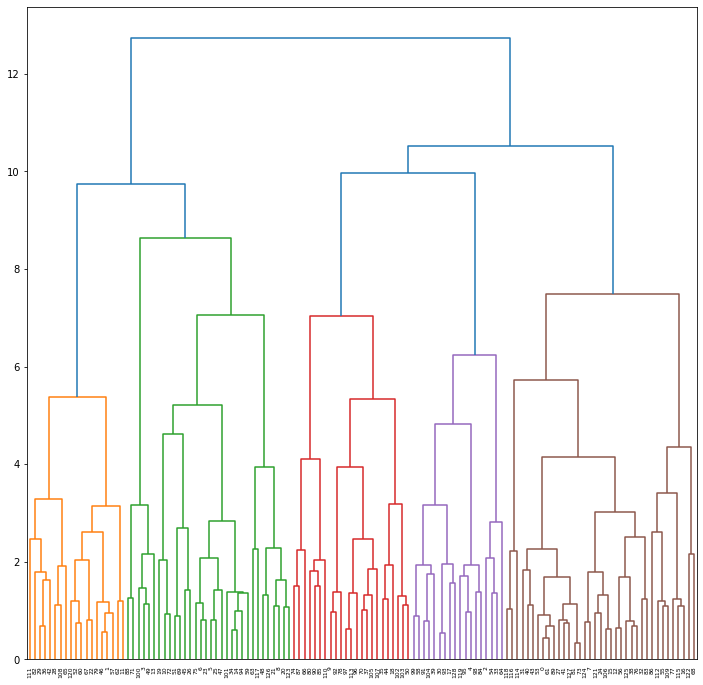

In [36]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
#plt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')
plt.show()

# This image is to big, therefore we decide to go with a small number of clusters

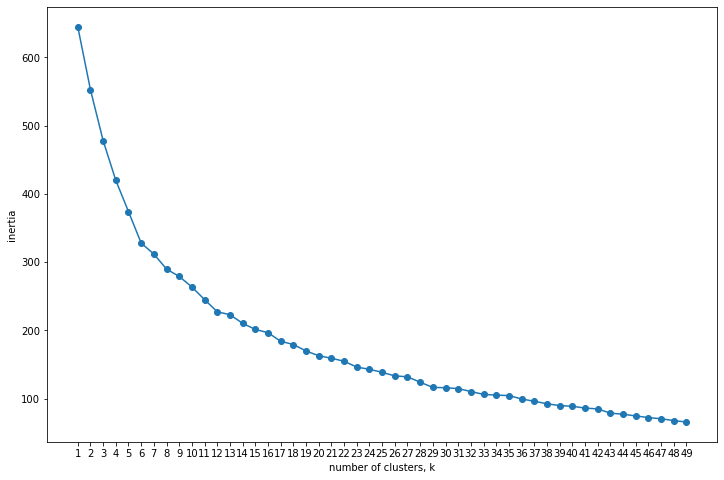

In [37]:
# calling the inertia_plot() function
inertia_plot(data = pca_scaled)
# Due to inertia, we decide on 5 clusters, cause at that point
# the inertia is reduced by half

In [38]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 5,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

# The clusters are similiar in size

2    31
4    29
0    27
3    23
1    19
Name: Cluster, dtype: int64


In [39]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ["Indecisive (High Conscientiousness, Low Emotional Stability)",
                           "Reckless (High extraversion low emotional stab)",
                           "Impressionable (High agreeableness low extraversion)",
                           "Condescending (High intellect, low agreeableness)",
                           "Sensible (High Emotional stability, low extraversion)"]


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

# We will look for similarities on the clusters

,"Indecisive (High Conscientiousness, Low Emotional Stability)",Reckless (High extraversion low emotional stab),Impressionable (High agreeableness low extraversion),"Condescending (High intellect, low agreeableness)","Sensible (High Emotional stability, low extraversion)"
0,-0.46,-0.64,-0.21,-0.97,0.30
1,0.00,-0.79,0.64,1.34,0.49
2,-1.00,0.59,-0.49,0.36,-0.34
3,0.54,0.79,1.15,-0.32,0.35
4,1.06,-0.14,-0.61,-0.11,-0.51


In [40]:
# naming the clusters
# we create labels that better represent each cluster

centroids_pca_df = centroids_pca_df.rename(index = {0:"Weak traits", 
                                                    1:"Computer snobs", 
                                                    2:"Decisive", 
                                                    3:"Gullible",
                                                    4:"Meticulous"})


centroids_pca_df.round (2)

,"Indecisive (High Conscientiousness, Low Emotional Stability)",Reckless (High extraversion low emotional stab),Impressionable (High agreeableness low extraversion),"Condescending (High intellect, low agreeableness)","Sensible (High Emotional stability, low extraversion)"
Weak traits,-0.46,-0.64,-0.21,-0.97,0.30
Computer snobs,0.00,-0.79,0.64,1.34,0.49
Decisive,-1.00,0.59,-0.49,0.36,-0.34
Gullible,0.54,0.79,1.15,-0.32,0.35
Meticulous,1.06,-0.14,-0.61,-0.11,-0.51


In [41]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_df.loc[ : , ["What laptop do you currently have?"
, "What laptop would you buy in next assuming if all laptops cost the same?"]],
                                clst_pca_df],
                                axis = 1)

# renaming regions
cluster_names = {0:"Weak traits", 
                 1:"Computer snobs", 
                 2:"Decisive", 
                 3:"Gullible",
                 4:"Meticulous"}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# renaming columns
final_pca_clust_df.columns = ["What laptop do you currently have?",
                              "What laptop would you buy in next assuming if all laptops cost the same?",
                              'Cluster',
                            "Indecisive (High Conscientiousness, Low Emotional Stability)",
                           "Reckless (High extraversion low emotional stab)",
                           "Impressionable (High agreeableness low extraversion)",
                           "Condescending (High intellect, low agreeableness)",
                       "Sensible (High Emotional stability, low extraversion)"]


# checking the results
final_pca_clust_df.head(n = 10)

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,Cluster,"Indecisive (High Conscientiousness, Low Emotional Stability)",Reckless (High extraversion low emotional stab),Impressionable (High agreeableness low extraversion),"Condescending (High intellect, low agreeableness)","Sensible (High Emotional stability, low extraversion)"
0,Macbook,Macbook,Meticulous,0.248952,-0.505081,0.505391,-0.011025,-1.078718
1,Windows laptop,Windows laptop,Computer snobs,0.845267,-0.591986,1.361889,2.053845,1.107067
2,Windows laptop,Windows laptop,Meticulous,1.286857,-2.454765,-4.448054,2.133418,-1.299191
3,Windows laptop,Windows laptop,Gullible,0.826527,2.600973,1.340038,-0.857590,2.788673
4,Macbook,Windows laptop,Meticulous,4.040381,1.547018,-0.697926,-0.259725,0.413318
5,Macbook,Macbook,Gullible,4.374116,0.431137,2.219687,-1.544589,-0.435125
6,Windows laptop,Macbook,Gullible,2.827189,0.771907,1.332124,0.075713,-0.742171
7,Windows laptop,Windows laptop,Decisive,-3.088197,-0.513853,-1.926624,-0.227597,-0.845151
8,Macbook,Macbook,Meticulous,1.406818,-1.960814,-0.067545,0.019126,-0.863523
9,Windows laptop,Chromebook,Decisive,-3.310346,-0.842657,0.196275,1.768960,-1.437798


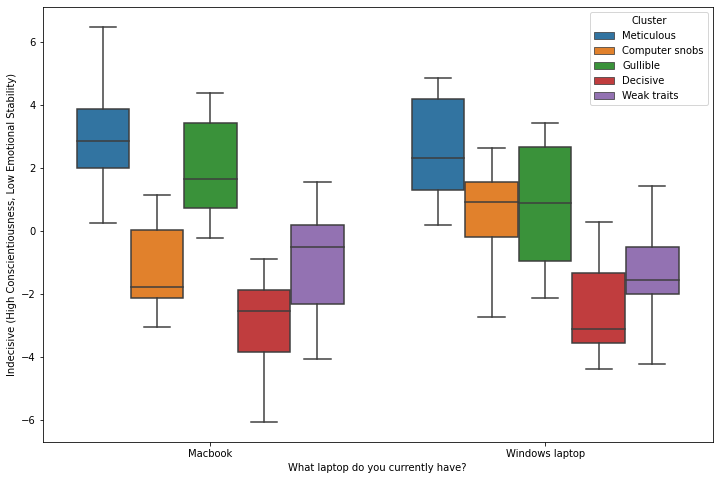

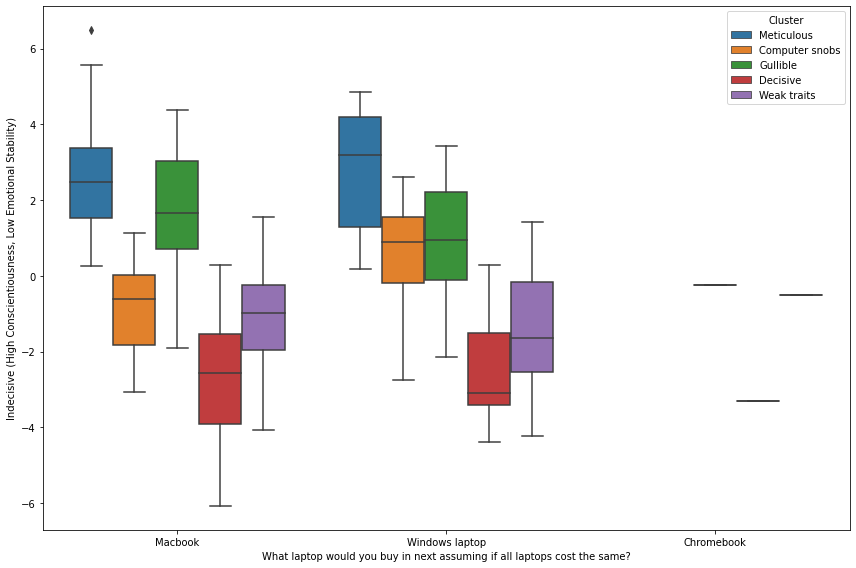

In [42]:
# Creating boxplots for each PC in order to find insigths
#INDECISIVE
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop do you currently have?",
            y = "Indecisive (High Conscientiousness, Low Emotional Stability)",
            hue = 'Cluster',
            data = final_pca_clust_df)

# INDECISIVE
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop would you buy in next assuming if all laptops cost the same?",
            y = "Indecisive (High Conscientiousness, Low Emotional Stability)",
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

Graph 1:
one PC: which is Indecisive And all the clusters And we only see change in organge cluster And in purple In orange: more windows than pac mac And in purple: more Mac than windows All current:


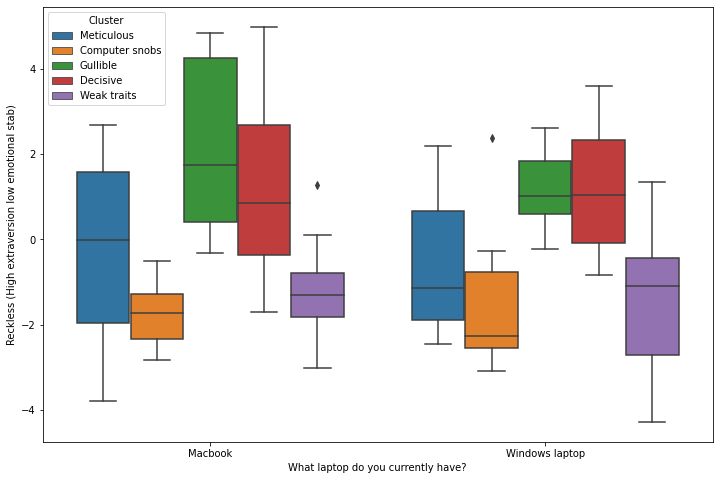

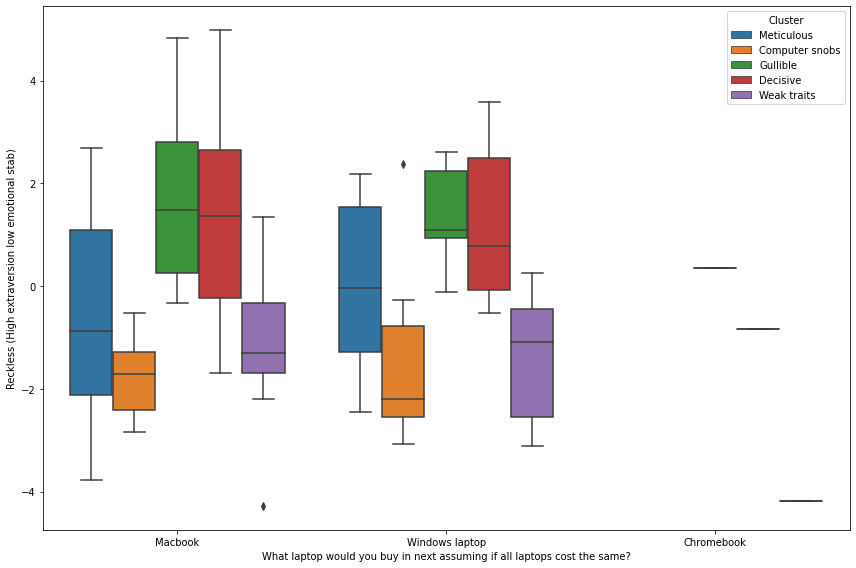

In [43]:
#RECKKLESNESS
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop do you currently have?",
            y = "Reckless (High extraversion low emotional stab)",
            hue = 'Cluster',
            data = final_pca_clust_df)

#RECKKLESNESS
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop would you buy in next assuming if all laptops cost the same?",
            y = "Reckless (High extraversion low emotional stab)",
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

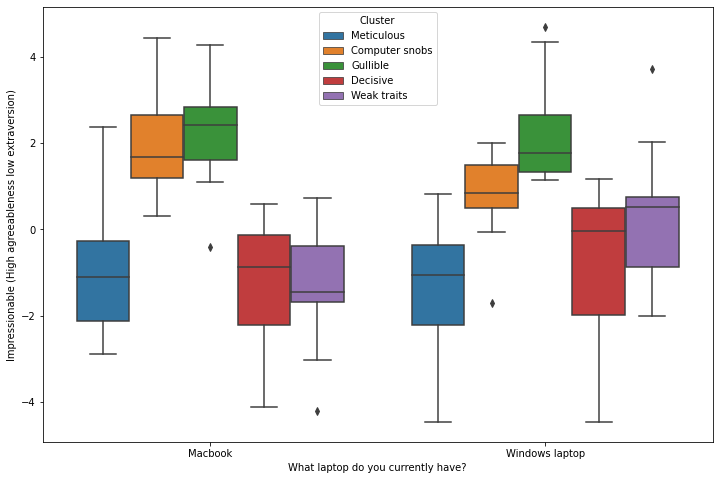

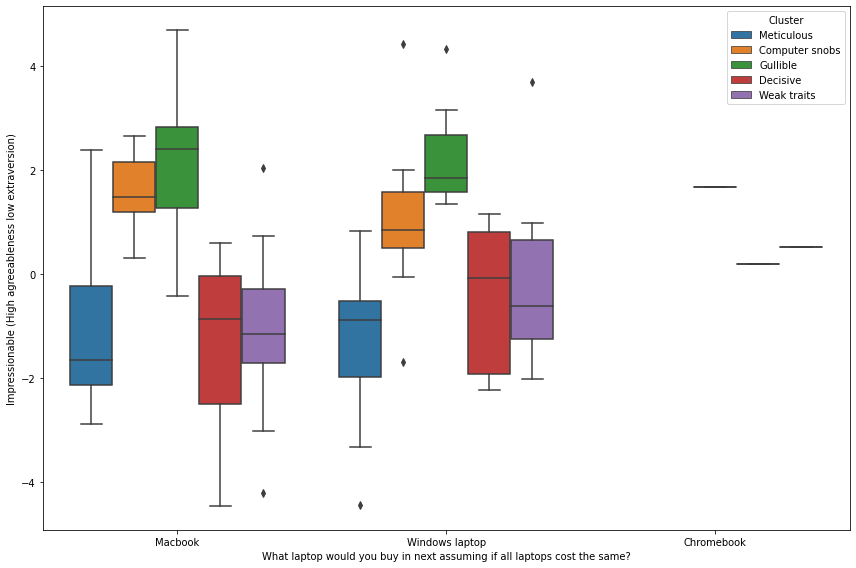

In [44]:
#IMPRESSIONABLE
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop do you currently have?",
            y = "Impressionable (High agreeableness low extraversion)",
            hue = 'Cluster',
            data = final_pca_clust_df)

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop would you buy in next assuming if all laptops cost the same?",
            y = "Impressionable (High agreeableness low extraversion)",
            hue = 'Cluster',
            data = final_pca_clust_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

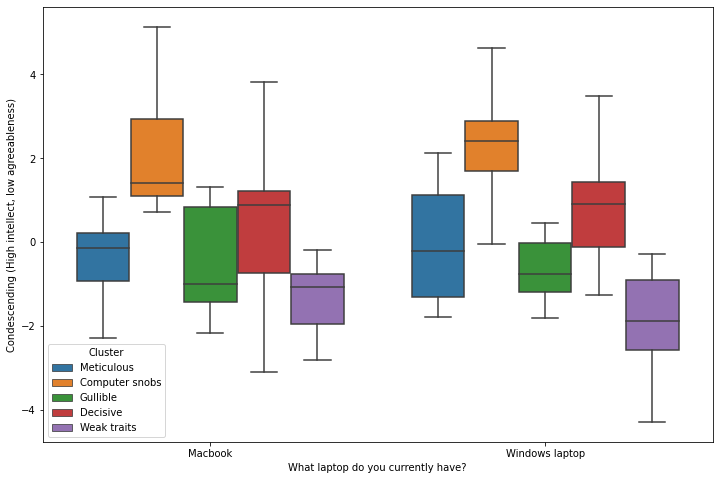

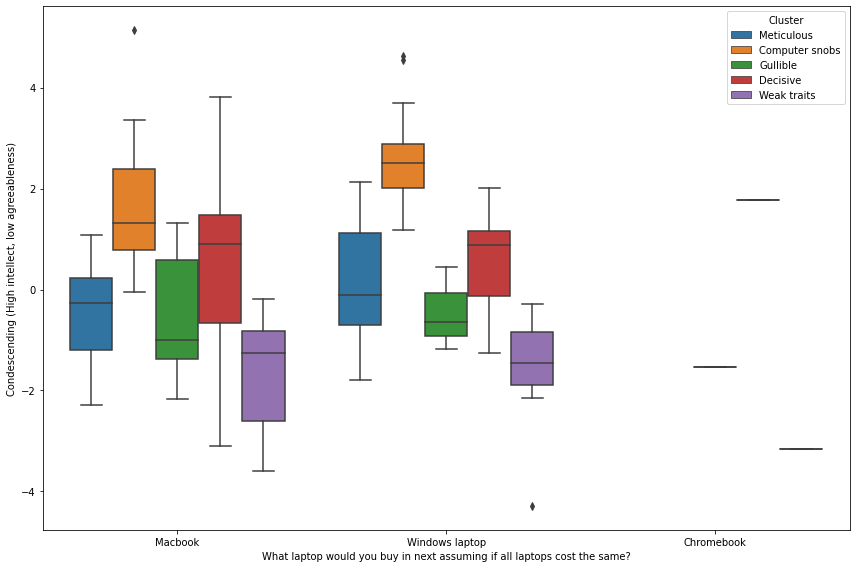

In [45]:
#CONDESCENDING
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop do you currently have?",
            y = "Condescending (High intellect, low agreeableness)",
            hue = 'Cluster',
            data = final_pca_clust_df)

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop would you buy in next assuming if all laptops cost the same?",
            y = "Condescending (High intellect, low agreeableness)",
            hue = 'Cluster',
            data = final_pca_clust_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

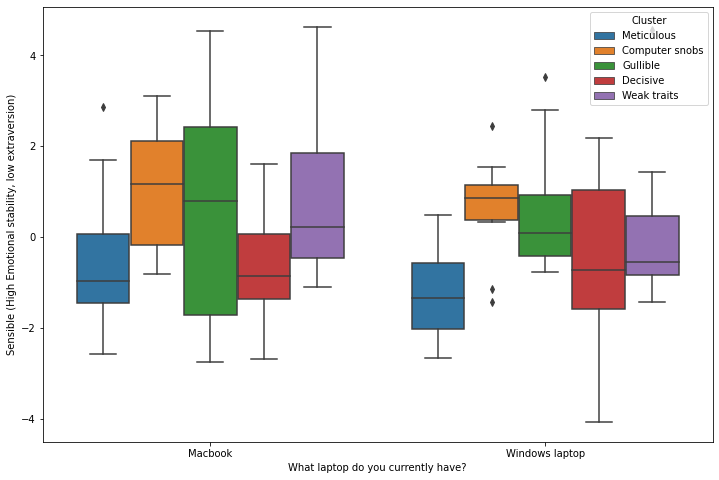

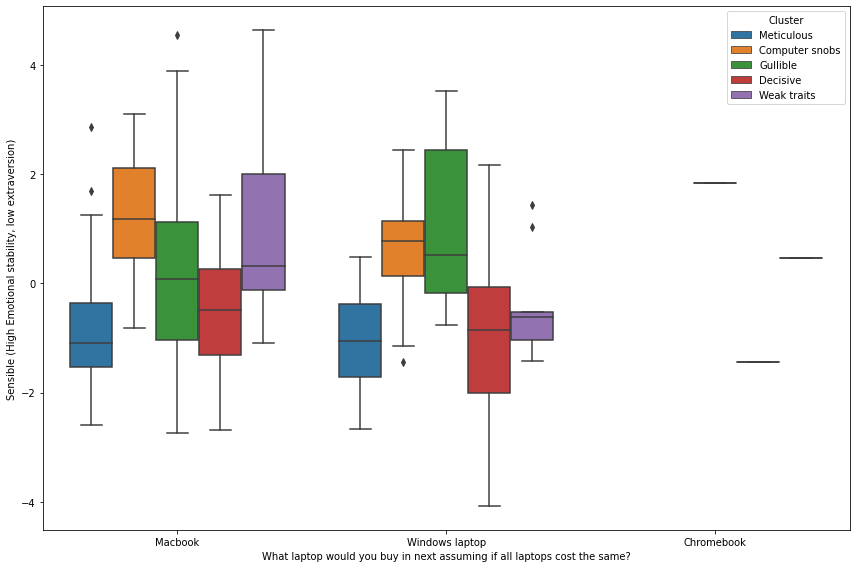

In [46]:
#SENSIBLE
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop do you currently have?",
            y = "Sensible (High Emotional stability, low extraversion)",
            hue = 'Cluster',
            data = final_pca_clust_df)

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop would you buy in next assuming if all laptops cost the same?",
            y = "Sensible (High Emotional stability, low extraversion)",
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# HULT DNA component analysis 

In [47]:
# INSTANTIATING a PCA object with no limit to principal components
# We would have 17 PCs which is too many, therefore we decided for the top 3
pca = PCA(n_components = 3,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
HULT_PCA = pca.fit_transform(HULT_dna_df_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", HULT_dna_df_scaled.shape)
print("PCA shape     :",  HULT_PCA.shape)

Original shape: (129, 17)
PCA shape     : (129, 3)


In [48]:
# component number counter
# We are lloking for an 80% explanation of the variance
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(decimals = 4)}")
    
# We will work with the first 3 PCs cause the next ones dont add enough value 

PC 1 : 0.3598
PC 2 : 0.0888
PC 3 : 0.0727


In [49]:
# here we try to figure out how many PC´s we shall use 
print(pca.explained_variance_ratio_[0:10].sum().round(decimals = 4))

0.5214


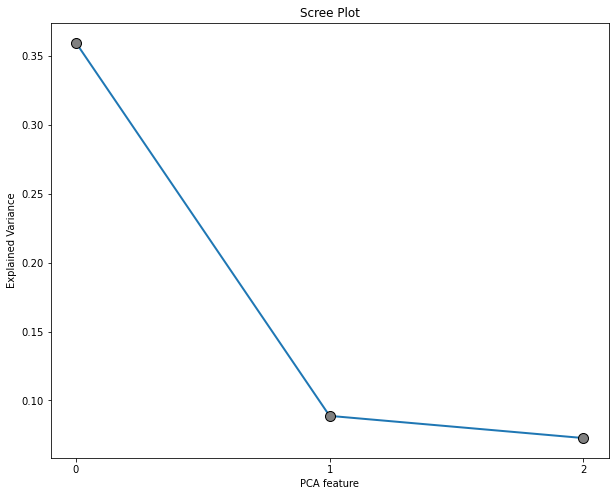

In [50]:
# calling the scree_plot function
scree_plot(pca_object = pca)

In [51]:
### Evaluating which features are influencing our PC´s 



####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings_HULT = factor_loadings.set_index(HULT_dna_df_scaled.columns)




# checking the results
print(f"""

------------------------------------------------------------------------------------
3 Components Factor (PC´s) Loadings for the HULT DNA
- note: the first PC ("0") is the one that explaines the most in the variance >35%
------------------------------------------------------------------------------------
{factor_loadings_HULT.round(2)}
""")



------------------------------------------------------------------------------------
3 Components Factor (PC´s) Loadings for the HULT DNA
- note: the first PC ("0") is the one that explaines the most in the variance >35%
------------------------------------------------------------------------------------
                                                                               0     1     2
See underlying patterns in complex situations                              -0.26  0.17 -0.10
Don't  generate ideas that are new and different                           -0.09  0.30 -0.59
Display a growth mindset                                                   -0.27 -0.03 -0.09
Respond effectively to multiple priorities                                 -0.28 -0.01  0.27
Take initiative even when circumstances, objectives, or rules aren't clear -0.28  0.07  0.25
Encourage direct and open discussions                                      -0.28  0.04  0.16
Listen carefully to others               

<ipython-input-51-bd41ce1227dd>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


In [52]:
# naming each principal component
factor_loadings_HULT.columns = ["Low Hult DNA Compatibility (Low Thinking, Communicating, Team-Building)",
                           "Individualist High Performer (High thinking, Low Communication)",
                           "Effective Non-Innovator (High Communiction, Low Thinking)"] # based on the 3 main traits of the HULT DNA


# checking the result
factor_loadings_HULT.head(n=5)

,"Low Hult DNA Compatibility (Low Thinking, Communicating, Team-Building)","Individualist High Performer (High thinking, Low Communication)","Effective Non-Innovator (High Communiction, Low Thinking)"
See underlying patterns in complex situations,-0.256423,0.172585,-0.098773
Don't generate ideas that are new and different,-0.088803,0.301138,-0.590902
Display a growth mindset,-0.272650,-0.025935,-0.093894
Respond effectively to multiple priorities,-0.279236,-0.014419,0.270950
"Take initiative even when circumstances, objectives, or rules aren't clear",-0.279646,0.068612,0.248786


In [53]:
## scaling the data
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(HULT_dna_df)


# TRANSFORMING our data after fit
X_HULT_scaled = scaler.transform(HULT_dna_df)


# converting scaled data into a DataFrame
HULT_dna_df_scaled = pd.DataFrame(X_HULT_scaled)


# reattaching column names
HULT_dna_df_scaled.columns = HULT_dna_df_scaled.columns




# checking pre- and post-scaling variance
print(pd.np.var(HULT_dna_df), '\n\n')
print(pd.np.var(HULT_dna_df_scaled))

See underlying patterns in complex situations                                 0.588186
Don't  generate ideas that are new and different                              1.139475
Display a growth mindset                                                      0.544559
Respond effectively to multiple priorities                                    0.593955
Take initiative even when circumstances, objectives, or rules aren't clear    0.724836
Encourage direct and open discussions                                         0.579893
Listen carefully to others                                                    0.658374
Don't persuasively sell a vision or idea                                      1.003906
Build cooperative relationships                                               0.515354
Work well with people from diverse cultural backgrounds                       0.460069
Effectively negotiate interests, resources, and roles                         0.524728
Can't rally people on the team around a com

<ipython-input-53-101616746d1e>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(HULT_dna_df), '\n\n')
<ipython-input-53-101616746d1e>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(HULT_dna_df_scaled))


In [54]:
# analyzing factor strengths per customer
X_HULT_pca = pca.transform(HULT_dna_df_scaled)


# converting to a DataFrame
X_HULT_pca_df = pd.DataFrame(X_HULT_pca)


# renaming columns
X_HULT_pca_df.columns = factor_loadings.columns


# checking the results
X_HULT_pca_df.head()

,0,1,2
0,0.061233,0.150769,0.104444
1,-0.734104,-0.433509,-1.626082
2,3.120089,2.117565,0.079493
3,-2.761590,-3.137210,0.309667
4,4.627016,-1.199820,0.430814


In [55]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_HULT_pca_df)


# TRANSFORMING our data after fit
X_HULT_scaled = scaler.transform(X_HULT_pca_df)


# converting scaled data into a DataFrame
pca_HULT_scaled = pd.DataFrame(X_HULT_scaled)


# reattaching column names
pca_HULT_scaled.columns = X_HULT_pca_df.columns


# checking pre- and post-scaling variance
print("NOT scaled:\n\n",pd.np.var(X_HULT_pca_df), '\n\n')
print("Scaled:\n",pd.np.var(pca_HULT_scaled))

NOT scaled:

 0    6.116736
1    1.510145
2    1.236422
dtype: float64 


Scaled:
 0    1.0
1    1.0
2    1.0
dtype: float64


<ipython-input-55-2475d2f03ea5>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print("NOT scaled:\n\n",pd.np.var(X_HULT_pca_df), '\n\n')
<ipython-input-55-2475d2f03ea5>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print("Scaled:\n",pd.np.var(pca_HULT_scaled))


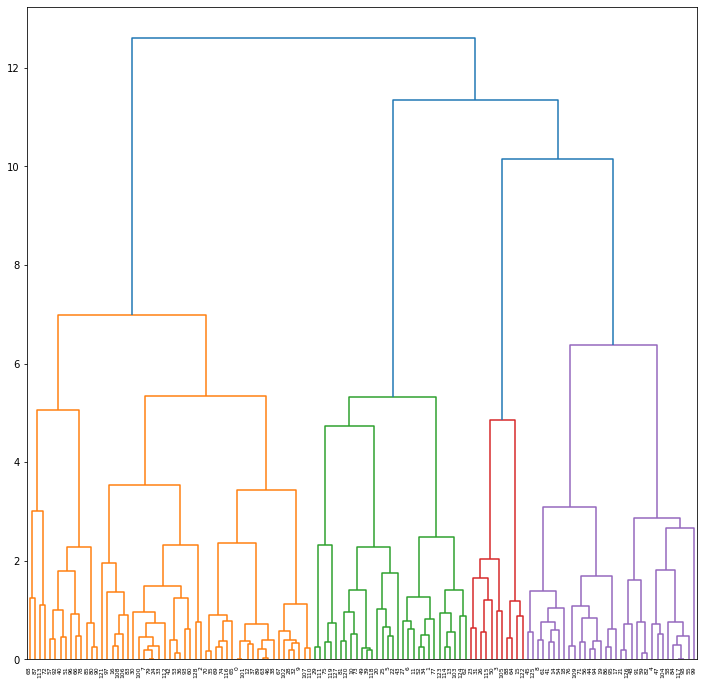

In [56]:
# grouping data based on Ward distance
# with this plot, we can choose a right number of clusters
standard_mergings_ward = linkage(y = pca_HULT_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)



# on the left side: t = distance 

# saving and displaying the plot
plt.savefig('./standard_hierarchical_clust_ward.png')
plt.show()

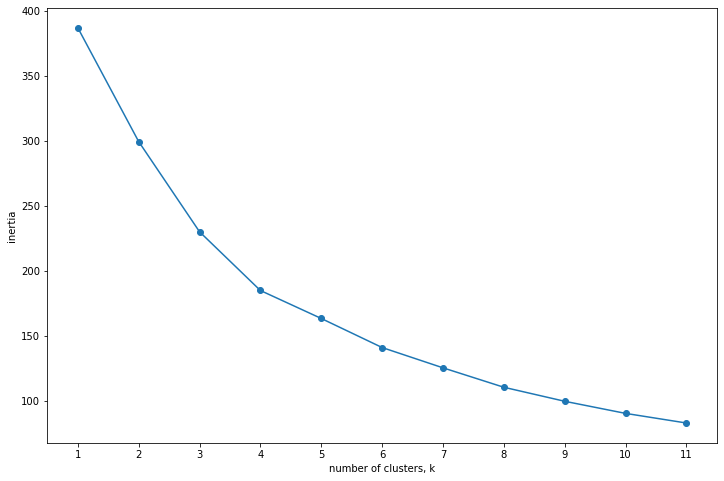

In [57]:
### rename the function 

# calling the inertia_plot() function
inertia_plot (data = pca_HULT_scaled, max_clust = 12)



In [58]:
# We decided for 4 clusters

# INSTANTIATING a k-Means object with 3 clusters
HULT_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
HULT_k_pca.fit(pca_HULT_scaled)


# converting the clusters to a DataFrame
HULT_kmeans_pca = pd.DataFrame({'Cluster_HULT': HULT_k_pca.labels_})


# checking the results
print(HULT_kmeans_pca.iloc[: , 0].value_counts())

1    43
0    35
3    32
2    19
Name: Cluster_HULT, dtype: int64


In [59]:
# storing cluster centers
centroids_HULT_pca = HULT_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_HULT_pca_df = pd.DataFrame(centroids_HULT_pca)


# renaming principal components
centroids_HULT_pca_df.columns = ["Low Hult DNA Compatibility (Low Thinking, Communicating, Team-Building)",
                           "Individualist High Performer (High thinking, Low Communication)",
                           "Effective Non-Innovator (High Communiction, Low Thinking)"] # based on the 3 main traits of the HULT DNA





# checking results (clusters = rows, pc = columns)
centroids_HULT_pca_df.round(2)

,"Low Hult DNA Compatibility (Low Thinking, Communicating, Team-Building)","Individualist High Performer (High thinking, Low Communication)","Effective Non-Innovator (High Communiction, Low Thinking)"
0,0.26,-0.53,-1.05
1,-0.54,0.88,-0.14
2,1.50,0.24,0.66
3,-0.46,-0.75,0.94


In [60]:
# naming the HULT clusters

centroids_HULT_pca_df = centroids_HULT_pca_df.rename(index = {0: "non_excelent_workers", 
                                                              1:"low_hult_higher_perfomer", 
                                                              2:"ignore them_super_HULTs_effecive", 
                                                              3: "hard_working_easy_tasks"})


centroids_HULT_pca_df.round (2)

,"Low Hult DNA Compatibility (Low Thinking, Communicating, Team-Building)","Individualist High Performer (High thinking, Low Communication)","Effective Non-Innovator (High Communiction, Low Thinking)"
non_excelent_workers,0.26,-0.53,-1.05
low_hult_higher_perfomer,-0.54,0.88,-0.14
ignore them_super_HULTs_effecive,1.50,0.24,0.66
hard_working_easy_tasks,-0.46,-0.75,0.94


In [61]:
# concatenating cluster memberships with principal components
clst_pca_df_HULT = pd.concat([HULT_kmeans_pca,
                         X_HULT_pca_df],
                         axis = 1)


# checking results
clst_pca_df_HULT


# concatenating demographic information with pca-clusters
final_pca_clust_df_HULT = pd.concat([survey_df.loc[ : , ["What laptop do you currently have?"
, "What laptop would you buy in next assuming if all laptops cost the same?"]],
                                clst_pca_df_HULT],
                                axis = 1)

# renaming regions
cluster_names = {0: "non_excelent_workers", 
                 1:"low_hult_higher_perfomer", 
                 2:"ignore them_super_HULTs_effecive", 
                 3: "hard_working_easy_tasks"}


final_pca_clust_df_HULT['Cluster_HULT'].replace(cluster_names, inplace = True)


# renaming columns
final_pca_clust_df_HULT.columns = ["What laptop do you currently have?",
                              "What laptop would you buy in next assuming if all laptops cost the same?",
                              'Cluster_HULT',
                           "Low Hult DNA Compatibility (Low Thinking, Communicating, Team-Building)",
                           "Individualist High Performer (High thinking, Low Communication)",
                           "Effective Non-Innovator (High Communiction, Low Thinking)"]


# checking the results
final_pca_clust_df_HULT.head(n = 10)

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,Cluster_HULT,"Low Hult DNA Compatibility (Low Thinking, Communicating, Team-Building)","Individualist High Performer (High thinking, Low Communication)","Effective Non-Innovator (High Communiction, Low Thinking)"
0,Macbook,Macbook,low_hult_higher_perfomer,0.061233,0.150769,0.104444
1,Windows laptop,Windows laptop,non_excelent_workers,-0.734104,-0.433509,-1.626082
2,Windows laptop,Windows laptop,ignore them_super_HULTs_effecive,3.120089,2.117565,0.079493
3,Windows laptop,Windows laptop,hard_working_easy_tasks,-2.761590,-3.137210,0.309667
4,Macbook,Windows laptop,ignore them_super_HULTs_effecive,4.627016,-1.199820,0.430814
5,Macbook,Macbook,non_excelent_workers,2.460407,-0.687546,-0.805533
6,Windows laptop,Macbook,non_excelent_workers,-1.117390,-0.541813,-0.826284
7,Windows laptop,Windows laptop,low_hult_higher_perfomer,-0.336462,0.823481,0.110404
8,Macbook,Macbook,hard_working_easy_tasks,0.556079,-0.494035,0.919342
9,Windows laptop,Chromebook,low_hult_higher_perfomer,-2.074696,0.271539,-0.668698


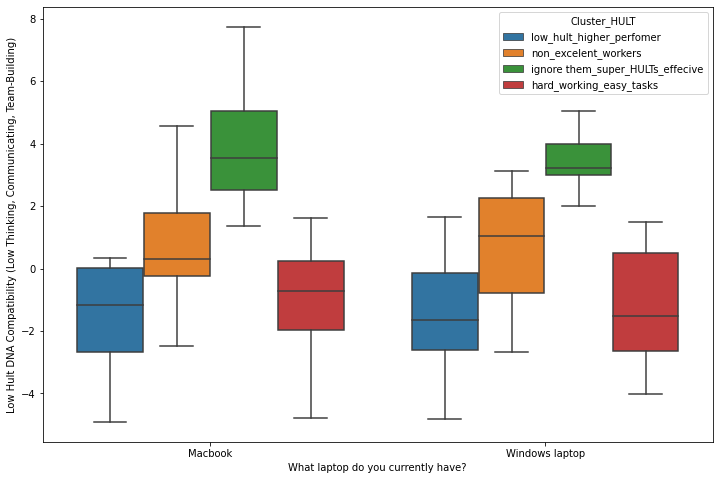

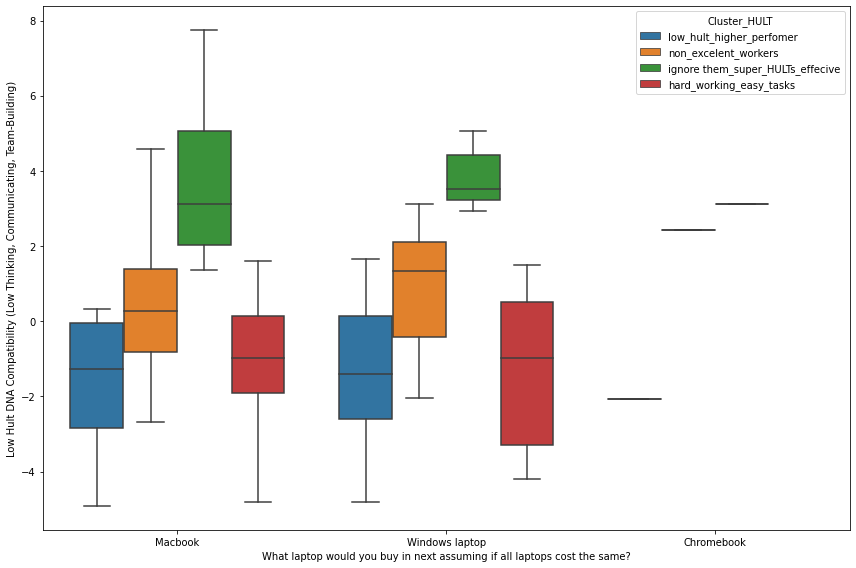

In [62]:
# Creating boxplots for each PC in order to find insigths

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop do you currently have?",
            y = "Low Hult DNA Compatibility (Low Thinking, Communicating, Team-Building)",
            hue = 'Cluster_HULT',
            data = final_pca_clust_df_HULT)

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop would you buy in next assuming if all laptops cost the same?",
            y = "Low Hult DNA Compatibility (Low Thinking, Communicating, Team-Building)",
            hue = 'Cluster_HULT',
            data = final_pca_clust_df_HULT)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

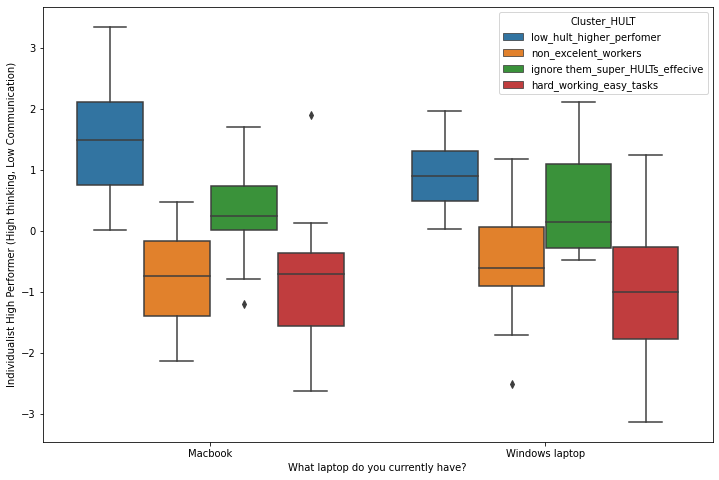

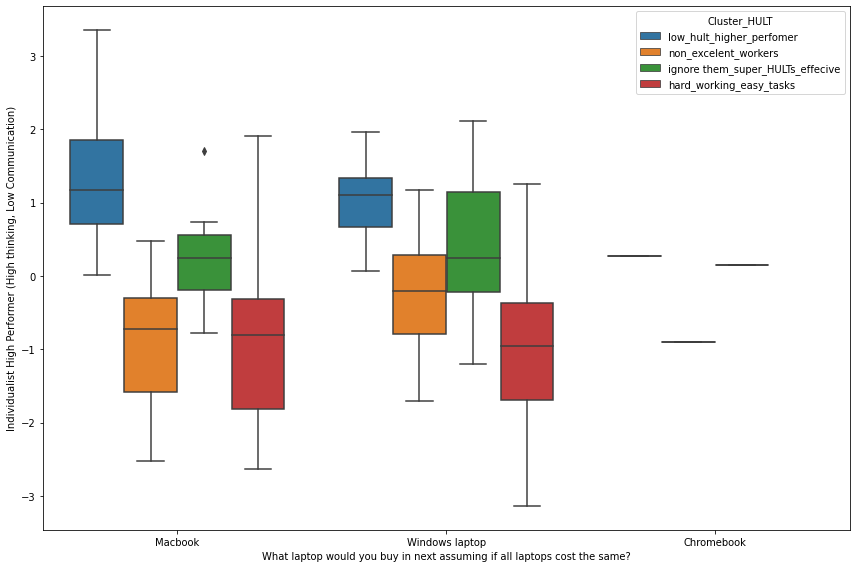

In [63]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop do you currently have?",
            y = "Individualist High Performer (High thinking, Low Communication)",
            hue = 'Cluster_HULT',
            data = final_pca_clust_df_HULT)

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop would you buy in next assuming if all laptops cost the same?",
            y = "Individualist High Performer (High thinking, Low Communication)",
            hue = 'Cluster_HULT',
            data = final_pca_clust_df_HULT)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

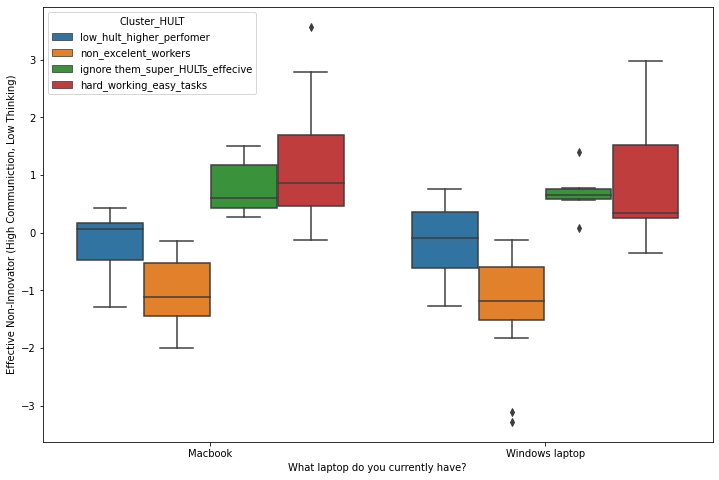

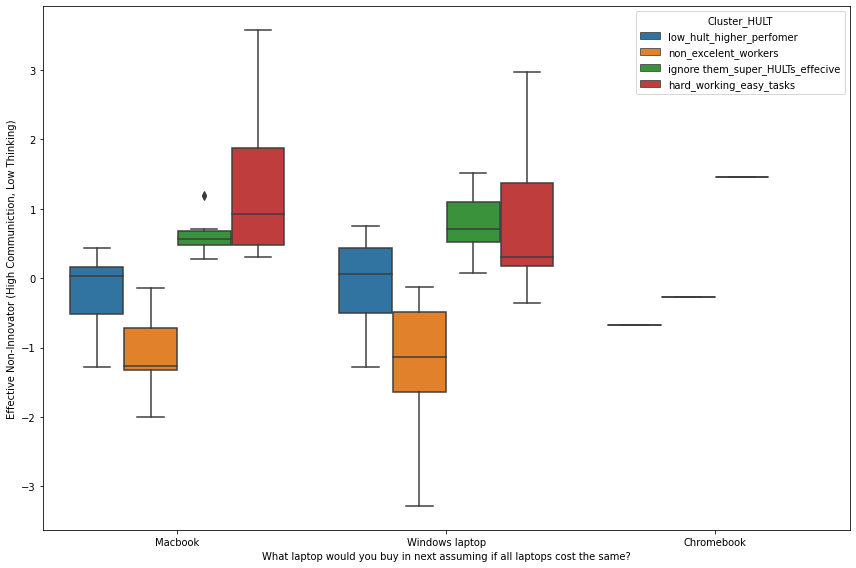

In [64]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop do you currently have?",
            y = "Effective Non-Innovator (High Communiction, Low Thinking)",
            hue = 'Cluster_HULT',
            data = final_pca_clust_df_HULT)

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "What laptop would you buy in next assuming if all laptops cost the same?",
            y = "Effective Non-Innovator (High Communiction, Low Thinking)",
            hue = 'Cluster_HULT',
            data = final_pca_clust_df_HULT)

# formatting and displaying the plot
plt.tight_layout()
plt.show()